# Introduction

Generally speaking, typical text objects include
* *label* (`set_xlabel`, `set_ylabel`, `set_title`, `suptitle`)
* *text* (`text`) & *annotation* (`annotate`)
* others

This module will also cover 
* niche text parameters
* `Locator` & `Formatter` object @ axis level
* difference between `text` & `annotate`
* `bbox` parameter

In [1]:
import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
from IPython.display import display

# *label*

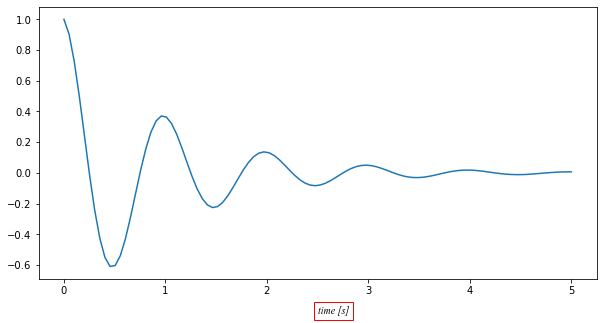

In [2]:
# example adopted from matplotlib docs
x1 = np.linspace(0.0, 5.0, 100); y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x1, y1)

# font properties adopted from matplotlib docs
# text also supports Latex
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

xlabel = ax.set_xlabel(
    xlabel = 'time [s]',
    # Set the (x, y) position of the text. only `x` works since this is setting x label.
    # Convenience parameter: `loc`, replacing position & alignment
    position = (0.5, 1), 
    # butt of the boundary box to the `position`
    horizontalalignment='left', 
    # padding in points between label & ticks, default to be 4.0
    labelpad = 10,
    # font properties
    fontproperties = font,
    # an imaginary boundary box object physically wrapped around text object
    bbox={'edgecolor': 'red', 'facecolor': 'white'},
)

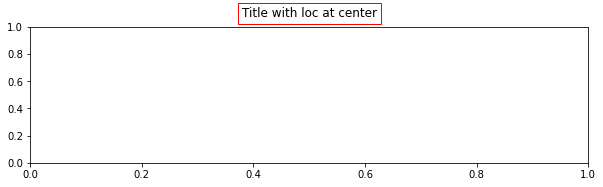

In [3]:
# example adopted from matplotlib docs
fig, ax = plt.subplots(figsize=(10, 2.5))
loc = 'center'
ax.set_title(
    label = 'Title with loc at ' + loc, 
    loc = loc,
    # `y` for distance in axes coordinate from title to top of axes
    # `pad` is points from title to top of axes
    pad = 10,
    bbox={'edgecolor': 'red', 'facecolor': 'white'},
)
plt.show()

# `Locator` & `Formatter`

The two relevant classes are Locators and Formatters. Locators determine where the ticks are, and formatters control the formatting of tick labels. - Matplotlib Docs

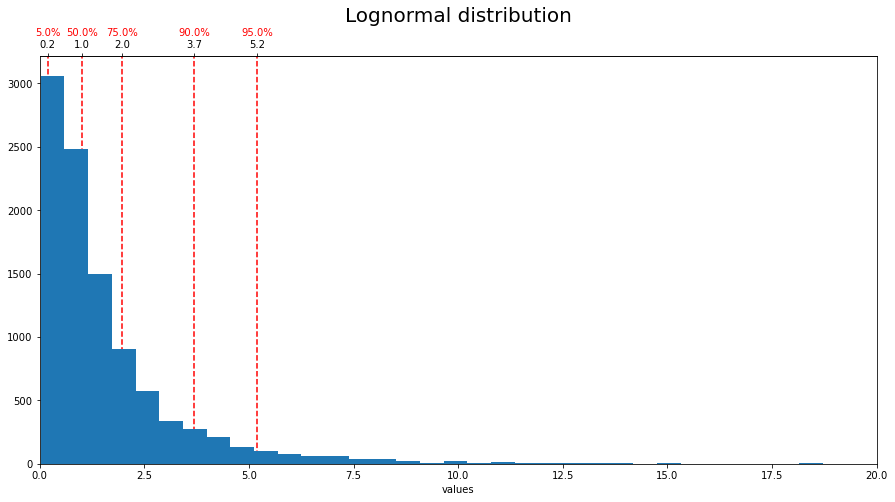

In [4]:
# imagine we need to plot a single variable discrete distribution 
rng = np.random.default_rng(3)
lognormal = rng.lognormal(size = 10000)
quantiles = np.array([0.05, 0.5, 0.75, 0.9, 0.95])
stats = np.quantile(lognormal, quantiles)

# data we want to plot
fig, ax = plt.subplots(figsize = (15, 7.5))
ax.set_xlim(right = 20)
ax.hist(lognormal, bins = 100)

# stat we want to label
ax1 = ax.secondary_xaxis('top')

locator = mticker.FixedLocator(stats)
ax1.xaxis.set_major_locator(locator)
ax1.set_xticklabels(list(map(lambda s: '{:.1f}'.format(s), stats.tolist())))

ax1.set_xticks(ax1.get_xticks(), minor = True)
ax1.set_xticklabels(list(map(lambda s: '{:.1%}'.format(s), quantiles.tolist())), minor = True)
ax1.xaxis.remove_overlapping_locs = False

# check if our ticks are perfect
for stat in stats: ax.axvline(stat, color = 'red', linestyle = '--', zorder = 0)

# formatting
ax1.tick_params(axis='x', which='minor', colors='red', length = 15, width = 0)
ax.tick_params(axis='x', which='minor', colors='red')

# ax.annotate('statistics', 
#             xy=(1,1), 
#             xytext=(0, ax1.xaxis.get_tick_padding()), 
#             ha='right', 
#             va=ax1.xaxis.get_ticks_position(),
#             xycoords='axes fraction', 
#             textcoords='offset points')
ax.set_xlabel('values', loc = 'center')

ax.set_title('Lognormal distribution', fontsize = 20)
plt.show()

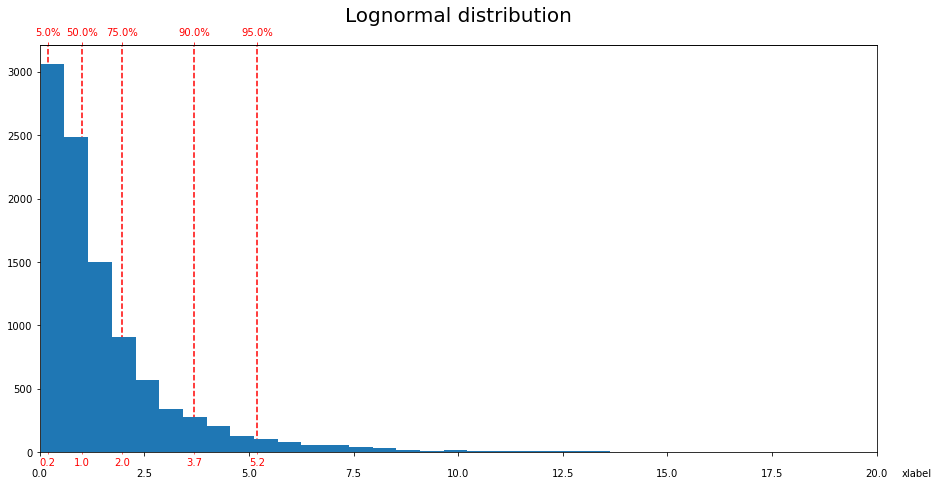

In [5]:
# another style showing the usage of FuncFormatter
rng = np.random.default_rng(3)
lognormal = rng.lognormal(size = 10000)
quantiles = np.array([0.05, 0.5, 0.75, 0.9, 0.95])
stats = np.quantile(lognormal, quantiles)

# data we want to plot
fig, ax = plt.subplots(figsize = (15, 7.5))
ax.set_xlim(right = 20)
ax.hist(lognormal, bins = 100)

# stat we want to label
ax1 = ax.secondary_xaxis('top')
locator = mticker.FixedLocator(stats)
formatter = mticker.FuncFormatter(lambda tick, pos: '{:.1%}'.format(quantiles[pos]))
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

mlocator = locator
mformatter = mticker.FuncFormatter(lambda tick, pos: '{:.1f}'.format(stats[pos]))
ax.xaxis.set_minor_locator(mlocator)
ax.xaxis.set_minor_formatter(mformatter)

# check if our ticks are perfect
for stat in stats: ax.axvline(stat, color = 'red', linestyle = '--', zorder = 0)

# try this but fail: ax.xaxis.remove_overlapping_locs = True
# therefore having to manually adjust overlapping locs
for tick in ax.get_xaxis().get_major_ticks(): tick.set_pad(13.)
ax1.tick_params(axis='x', which='major', colors='red')
ax.tick_params(axis='x', which='minor', colors='red')

ticklab = ax.xaxis.get_ticklabels()[0]
trans = ticklab.get_transform()
xlabel = ax.set_xlabel('xlabel', ha = 'left', va = 'top', fontsize = ticklab.get_size())
ax.xaxis.set_label_coords(ax.get_xlim()[1] * 1.03, 0, transform=trans)

ax.set_title('Lognormal distribution', fontsize = 20)
plt.show()

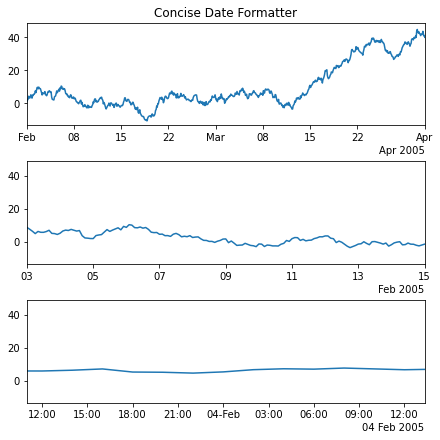

In [6]:
# This example shows you the usage of ConciseDateFormatter - adopted from Matplotlib Docs
base = datetime.datetime(2005, 2, 1)
dates = [base + datetime.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]

fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(6, 6))

for nn, ax in enumerate(axs):
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    formatter.formats = ['%y',  # ticks are mostly years
                         '%b',       # ticks are mostly months
                         '%d',       # ticks are mostly days
                         '%H:%M',    # hrs
                         '%H:%M',    # min
                         '%S.%f', ]  # secs
    # these are mostly just the level above...
    formatter.zero_formats = [''] + formatter.formats[:-1]
    # ...except for ticks that are mostly hours, then it is nice to have
    # month-day:
    formatter.zero_formats[3] = '%d-%b'

    formatter.offset_formats = ['',
                                '%Y',
                                '%b %Y',
                                '%d %b %Y',
                                '%d %b %Y',
                                '%d %b %Y %H:%M', ]
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
axs[0].set_title('Concise Date Formatter')

plt.show()

In [1]:
# some other stuffs to notice or niche method 
# Axes.set_xticks <- Axis.set_ticks - FixedLocator
# Axis tick & label orientation
    # `tick_left`
    # `label_outer`
    # *labeltop* etc.
# `ticklabel_format` for scientific format functionality embedded in `ScalarFormatter`

# `text` & `annotate` & `bbox`

`text` is a generic text plotting object while an `Annotation` is a `Text` that can refer to a specific position xy. Optionally an arrow pointing from the text to xy can be drawn. Additionally, `Annotation` provides relative positioning functionality than `text`.

`bbox` is a rectangle patch wrapped around an artist, much like box in CSS.

**Resources**

Tutorials

* [Text in Matplotlib Plots](https://matplotlib.org/devdocs/tutorials/text/text_intro.html)
* [Text properties and layout](https://matplotlib.org/devdocs/tutorials/text/text_props.html)
* [Annotations](https://matplotlib.org/devdocs/tutorials/text/annotations.html)
* [Major and minor ticks](https://matplotlib.org/devdocs/gallery/ticks/major_minor_demo.html)
* Date Formatter
    * [ConciseDateFormatter](https://matplotlib.org/devdocs/gallery/index.html#ticks)
    * [ScalarFormatter](https://matplotlib.org/devdocs/gallery/ticks/scalarformatter.html#sphx-glr-gallery-ticks-scalarformatter-py)

APIs

* [`matplotlib.text`](https://matplotlib.org/devdocs/api/text_api.html#matplotlib.text.Text)
* [`matplotlib.axis`](https://matplotlib.org/devdocs/api/axis_api.html#module-matplotlib.axis)
* [`matplotlib.ticker`](https://matplotlib.org/devdocs/api/ticker_api.html#matplotlib.ticker.FormatStrFormatter)
* [`matplotlib.dates`](https://matplotlib.org/devdocs/api/dates_api.html#matplotlib.dates.ConciseDateFormatter)
* [`matplotlib.units`](https://matplotlib.org/devdocs/api/units_api.html#module-matplotlib.units)
